# Time samples analysis

Read from file the samples:

In [33]:
file="time_optimized_0_1000"
f = open(file+".txt")
l=[]
for line in f:
    l.append([w for w in line.replace("\t", " ").replace("\n", "").split(" ") if w != ''])
f.close()
# l[:3]

Convert the data to CSV (easier to pass them to pandas):

In [34]:
ll = []
i=0
while i<len(l):
    if "__" in l[i][0]:
        print(l[i])
        i+=1
    else:
        try:
            v, p, e = l[i][0][:-4].split("_")
            ll.append([int(v), float(p), int(e), float(l[i+1][1][:-1]), float(l[i+2][1][:-1]), float(l[i+3][1][:-1]), int(l[i+4][1]), int(l[i+5][1])])
            i+=6
        except:
            print([v, p, e, l[i+1][1][:-1], l[i+2][1][:-1], l[i+3][1][:-1], l[i+4][1], l[i+5][1]])
            i+=1
ll[1000]

[100, 0.091919, 874, 3.8e-05, 1.7e-05, 1.2e-05, 1, 1]

In [35]:
import csv
f = open(file+".csv", "w")
f.write("vertices,percentage,edges,tarjan,nuutila,pearce,components,correct\n")
w = csv.writer(f)
w.writerows(ll)
f.close()

# Load samples with pandas: 

In [36]:
import pandas as pd
t = pd.read_csv(file+".csv")
print ("Number of samples : ",t.count())
print("Incorrect results : ", t.correct[t.correct==0].count())

Number of samples :  vertices      39996
percentage    39996
edges         39996
tarjan        39996
nuutila       39996
pearce        39996
components    39996
correct       39996
dtype: int64
Incorrect results :  0


In [37]:
t.describe()

,vertices,percentage,edges,tarjan,nuutila,pearce,components,correct
count,39996.000000,39996.000000,39996.000000,39996.000000,39996.000000,39996.000000,39996.000000,39996.0
mean,506.868687,0.089201,488.939094,0.000051,0.000028,0.000022,447.016502,1.0
std,289.516085,0.663593,289.678980,0.000040,0.000028,0.000017,333.773622,0.0
min,10.000000,0.000000,0.000000,0.000003,0.000001,0.000001,1.000000,1.0
25%,250.000000,0.000727,240.000000,0.000027,0.000016,0.000012,100.000000,1.0
50%,510.000000,0.001716,488.000000,0.000045,0.000025,0.000020,460.000000,1.0
75%,760.000000,0.006799,739.000000,0.000068,0.000037,0.000028,747.000000,1.0
max,1000.000000,11.111111,1002.000000,0.002410,0.003295,0.001310,1000.000000,1.0


### Remove outliers above the 99-th percentile for all the algorithms:

In [38]:
for alg in ["tarjan","nuutila","pearce"]:
    qt1=t[alg].quantile(0.99)
    print(alg, qt1)
    t = t[t[alg]<qt1]

tarjan 0.000144
nuutila 8.6e-05
pearce 5.3e-05


### Average samples with same number of vertices and edges:

In [39]:
t= t[["vertices","edges","tarjan","nuutila", "pearce"]].groupby(by=["vertices","edges"], as_index=False).mean()
t["v+e"]=t["vertices"]+t["edges"]

In [40]:
t.describe()

,vertices,edges,tarjan,nuutila,pearce,v+e
count,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000
mean,511.316852,492.182240,0.000049,0.000027,0.000021,1003.499092
std,286.976421,288.822664,0.000026,0.000013,0.000010,416.009851
min,10.000000,0.000000,0.000004,0.000002,0.000001,10.000000
25%,260.000000,240.000000,0.000029,0.000017,0.000013,700.250000
50%,510.000000,490.000000,0.000046,0.000026,0.000020,1008.000000
75%,760.000000,740.000000,0.000068,0.000037,0.000028,1309.000000
max,1000.000000,1002.000000,0.000126,0.000067,0.000045,2000.000000


# Plots
### In (V+E,t) space averaging 10 samples:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f851d8785c0>,
      dtype=object)

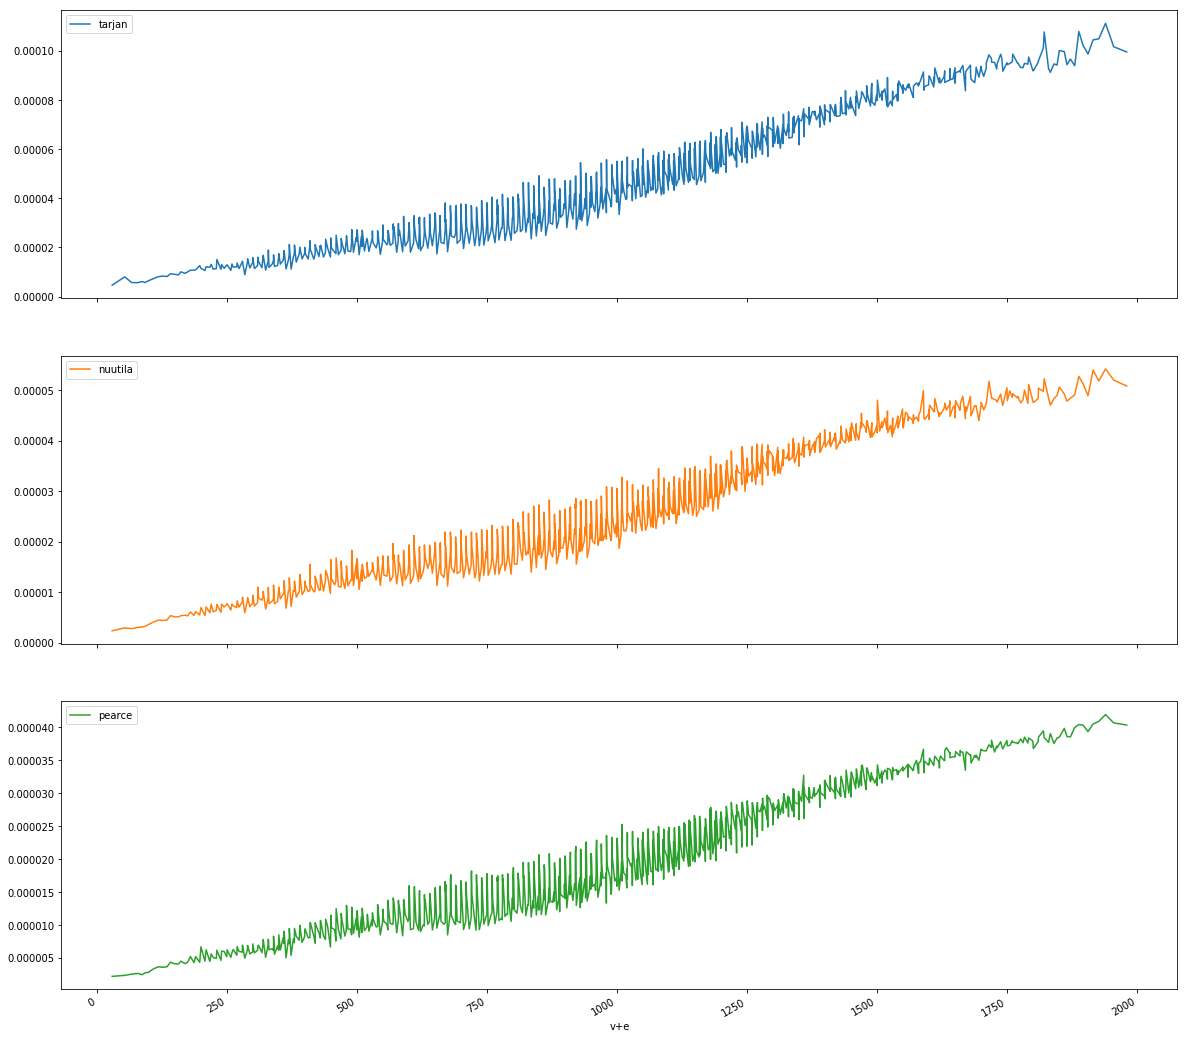

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
t = t.sort_values(by=["v+e","edges","vertices"])
t.groupby(np.arange(len(t))//10).mean().plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(20,20), subplots=True)

### In (V+E,t) space averaging 100 samples:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f851d808320>,
      dtype=object)

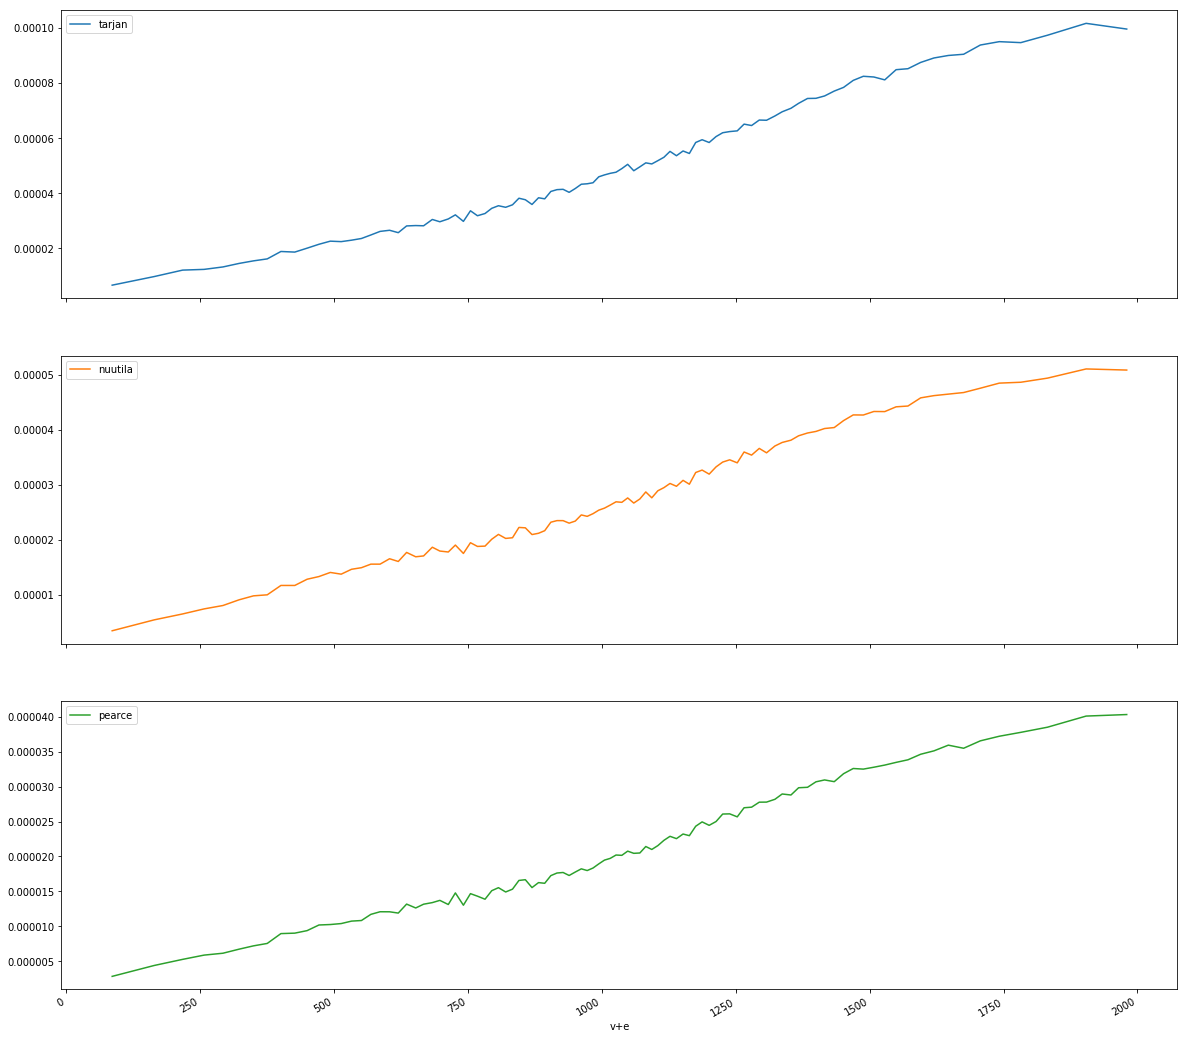

In [42]:
t.groupby(np.arange(len(t))//100).mean().plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(20,20), subplots=True)

In [43]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

import pandas as pd
plotly.tools.set_credentials_file(username='pscorso93', api_key='K4XqlXUNVsiWVSEtsFEZ')

# Plots in (V,E,t) space:
## Tarjan:

In [44]:
x1 = np.linspace(t['vertices'].min(), t['vertices'].max(), len(t['vertices'].unique()))
y1 = np.linspace(t['edges'].min(), t['edges'].max(), len(t['edges'].unique()))

x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['vertices'], df['edges']), df['tarjan'], (x2, y2), method='cubic')

data = [
    go.Surface(
        x=x2,
        y=y2,
        z=z2
    )
]

layout = go.Layout(
    title='Tarjan',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='elevations-3d-surface')

## Nuutila:

In [45]:
x1 = np.linspace(t['vertices'].min(), t['vertices'].max(), len(t['vertices'].unique()))
y1 = np.linspace(t['edges'].min(), t['edges'].max(), len(t['edges'].unique()))

x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['vertices'], df['edges']), df['nuutila'], (x2, y2), method='cubic')

data = [
    go.Surface(
        x=x2,
        y=y2,
        z=z2
    )
]

layout = go.Layout(
    title='Nuutila',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='elevations-3d-surface')

## Pearce:

In [46]:
x1 = np.linspace(t['vertices'].min(), t['vertices'].max(), len(t['vertices'].unique()))
y1 = np.linspace(t['edges'].min(), t['edges'].max(), len(t['edges'].unique()))

x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['vertices'], df['edges']), df['pearce'], (x2, y2), method='cubic')

data = [
    go.Surface(
        x=x2,
        y=y2,
        z=z2
    )
]

layout = go.Layout(
    title='Pearce',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='elevations-3d-surface')

